# business problem understanding
- (hypothetical) marketing department needs some help in focussing on the most important market segment. Instead of marketing to everyone, they need our help in identifying who our most profitable customers are. Are they married or unmarried, working or retired, premium or budget buyers etc… This will help them position things better.

- Also, they need help in identifying the bestselling products. 

- So, given the transaction data, help us identify the top 3 most profitable products and characteristics of our most loyal customers.  Also include your hypothesis of why you think the loyal customers like

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')


In [98]:
df1=pd.read_csv(r"D:\transaction_data.csv")

In [99]:
df2=pd.read_csv(r"D:\purchase_behaviour.csv")


In [100]:
data=pd.merge(df1, df2,how='right')

In [101]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [103]:
data.shape

(264836, 10)

In [104]:
data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

- drop meaningless data

In [105]:
data.drop(columns=['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR'],inplace=True)

In [106]:
data.columns


Index(['PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [107]:
data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [108]:
data['PROD_NAME'].nunique()

114

In [109]:
data['PROD_NAME'].value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [110]:
data['PROD_QTY'].unique()

array([  2,   1,   4,   3,   5, 200], dtype=int64)

In [111]:
data['PROD_QTY'].value_counts()

PROD_QTY
2      236039
1       27518
5         450
3         430
4         397
200         2
Name: count, dtype: int64

In [112]:
data['TOT_SALES'].nunique()

112

In [113]:
data['TOT_SALES'].unique()

array([  6.  ,   2.7 ,   3.6 ,   3.  ,   1.9 ,   2.8 ,   3.8 ,   5.7 ,
         8.8 ,   5.1 ,   6.2 ,   2.9 ,   4.6 ,   3.9 ,   4.2 ,   4.4 ,
         2.4 ,   3.1 ,   2.6 ,   2.1 ,   5.4 ,   2.3 ,   1.8 ,   3.3 ,
         4.8 ,   5.8 ,   8.4 ,   1.7 ,   3.4 ,   7.4 ,   3.7 ,  10.8 ,
         5.9 ,  11.8 ,   1.5 ,  10.2 ,   7.6 ,   6.6 ,   4.3 ,  11.4 ,
         6.5 ,   7.8 ,   9.2 ,   5.2 ,   6.3 ,   7.2 ,   8.6 ,  10.4 ,
        15.  ,  13.8 ,  13.  ,   3.25,  11.1 ,  17.7 ,   5.6 ,  22.  ,
        18.4 ,  15.3 ,   9.9 ,  13.5 ,  13.2 ,  15.2 ,  17.6 ,  23.  ,
        19.5 ,  12.  ,  11.6 ,  16.5 ,  18.5 ,  11.7 ,  22.8 ,   8.5 ,
        14.8 ,  15.5 ,   9.  ,  12.6 ,  16.25,   9.6 ,  21.5 ,  17.1 ,
        20.4 ,  14.5 ,  29.5 ,  10.5 ,  15.6 ,  19.  ,   6.8 ,  21.6 ,
        16.2 ,   8.7 ,  27.  ,  25.5 ,   4.5 ,   9.5 ,  18.  ,   9.3 ,
        23.6 ,  16.8 ,   9.75,  21.  ,  14.  ,   6.9 ,  14.4 ,   8.1 ,
        11.5 ,  28.5 ,  12.4 ,  17.2 ,   7.5 ,  11.2 ,  12.9 , 650.  ])

In [114]:
data['TOT_SALES'].value_counts()

TOT_SALES
9.2      22821
7.4      22513
6.0      20798
7.6      20212
8.8      19900
         ...  
9.3          3
15.5         3
12.4         2
11.2         2
650.0        2
Name: count, Length: 112, dtype: int64

In [115]:
data['LIFESTAGE'].nunique()

7

In [116]:
data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [117]:
data['LIFESTAGE'].value_counts()

LIFESTAGE
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64

In [118]:
data['PREMIUM_CUSTOMER'].nunique()

3

In [119]:
data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [120]:
data['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    101988
Budget         93157
Premium        69691
Name: count, dtype: int64

# Exploratory Data Analysis

In [121]:
Discrete_categorical=['PROD_NAME','LIFESTAGE', 'PREMIUM_CUSTOMER']
Discrete_count=['PROD_QTY','TOT_SALES']
data.dtypes

PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

# for categorical variable

In [122]:
data[Discrete_categorical].describe()

,PROD_NAME,LIFESTAGE,PREMIUM_CUSTOMER
count,264836,264836,264836
unique,114,7,3
top,Kettle Mozzarella Basil & Pesto 175g,OLDER SINGLES/COUPLES,Mainstream
freq,3304,54479,101988


In [123]:
data[Discrete_categorical].describe()

,PROD_NAME,LIFESTAGE,PREMIUM_CUSTOMER
count,264836,264836,264836
unique,114,7,3
top,Kettle Mozzarella Basil & Pesto 175g,OLDER SINGLES/COUPLES,Mainstream
freq,3304,54479,101988


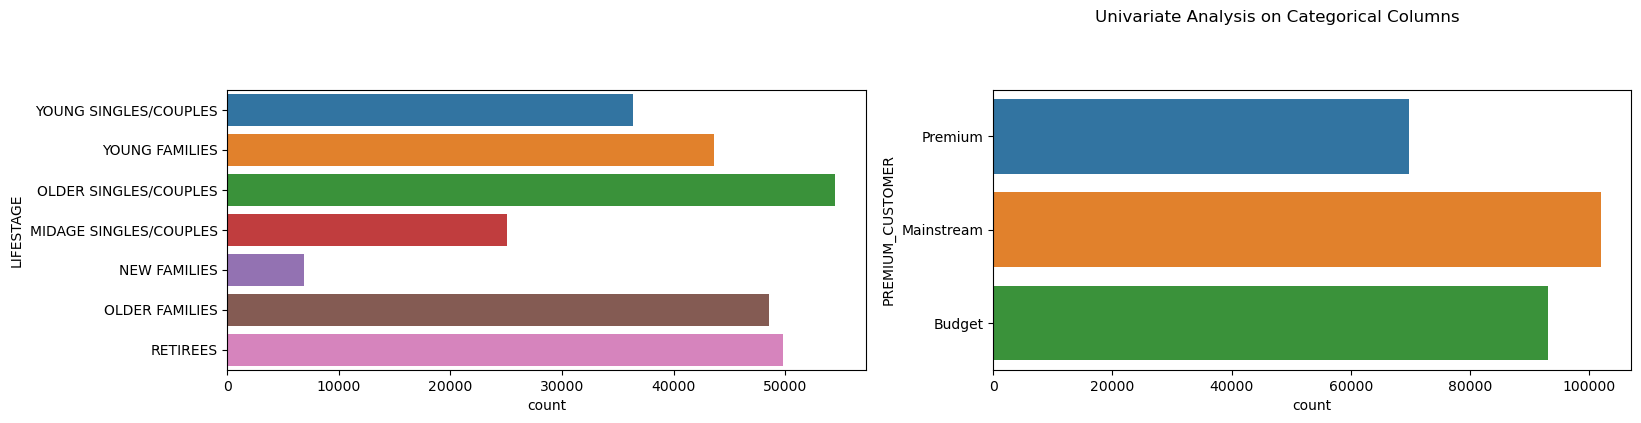

In [124]:
plt.rcParams['figure.figsize'] = (28, 8)
plt.subplot(2, 3, 1)
sns.countplot(data=data, y='LIFESTAGE') 
plt.subplot(2, 3, 2)
sns.countplot(data=data, y='PREMIUM_CUSTOMER') 
plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()


In [125]:
data['TOT_SALES'].nunique()

112

In [126]:
print('impact of lifestage on premium customer')
print(pd.crosstab(data['PREMIUM_CUSTOMER'],data['LIFESTAGE']))
print('\n')
print('impact of products on premium customer')
print(pd.crosstab(data['PREMIUM_CUSTOMER'],data['PROD_NAME']))
print('\n')
print('impact of premium customer on life stage')
print(pd.crosstab(data['LIFESTAGE'],data['PREMIUM_CUSTOMER']))
print('\n')
print('impact of products on life stage')
print(pd.crosstab(data['LIFESTAGE'],data['PROD_NAME']))
print('\n')

impact of lifestage on premium customer
LIFESTAGE         MIDAGE SINGLES/COUPLES  NEW FAMILIES  OLDER FAMILIES  \
PREMIUM_CUSTOMER                                                         
Budget                              5020          3005           23160   
Mainstream                         11874          2325           14244   
Premium                             8216          1589           11192   

LIFESTAGE         OLDER SINGLES/COUPLES  RETIREES  YOUNG FAMILIES  \
PREMIUM_CUSTOMER                                                    
Budget                            18407     15201           19122   
Mainstream                        18318     21466           12907   
Premium                           17754     13096           11563   

LIFESTAGE         YOUNG SINGLES/COUPLES  
PREMIUM_CUSTOMER                         
Budget                             9242  
Mainstream                        20854  
Premium                            6281  


impact of products on premium c

In [127]:
data.isnull().sum()

PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

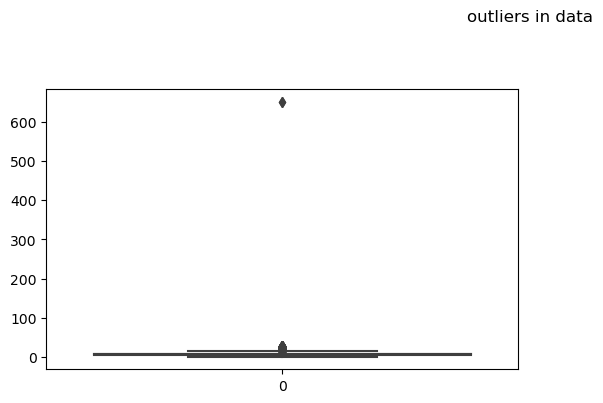

In [128]:
plt.subplot(2,4,2)
sns.boxplot(data['TOT_SALES'])
plt.suptitle('outliers in data')
plt.show()

In [ ]:
#outliers can be retained because it could have high amount of total sales

In [132]:

   def comprehensive_retail_analysis(data):
    # 1. Product Analysis
    product_metrics = data.groupby('PROD_NAME').agg({
        'PROD_QTY': 'sum',
        'TOT_SALES': 'sum'
    }).sort_values('TOT_SALES', ascending=False)
    
    # 2. Customer Segmentation
    customer_segments = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
        'TXN_ID': 'count',
        'TOT_SALES': ['sum', 'mean'],
        'PROD_QTY': 'sum'
    }).round(2)
    
    # 3. Prepare data for classification
    customer_metrics = data.groupby('LYLTY_CARD_NBR').agg({
        'TXN_ID': 'count',
        'TOT_SALES': ['sum', 'mean'],
        'LIFESTAGE': 'first',
        'PREMIUM_CUSTOMER': 'first'
    }).reset_index()
    
    # 4. Machine Learning Analysis
    le_lifestage = LabelEncoder()
    X = customer_metrics[['TXN_ID', ('TOT_SALES', 'sum'), ('TOT_SALES', 'mean')]]
    y = le_lifestage.fit_transform(customer_metrics['LIFESTAGE'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, 
                                      target_names=le_lifestage.classes_,
                                      output_dict=True)
    
    # 5. Premium Customer Analysis
    premium_analysis = data.groupby('PREMIUM_CUSTOMER').agg({
        'TOT_SALES': ['sum', 'mean'],
        'PROD_QTY': ['sum', 'mean'],
        'TXN_ID': 'count'
    }).round(2)
    
    return {
        'top_products': product_metrics.head(10),
        'customer_segments': customer_segments,
        'model_performance': {
            'accuracy': accuracy,
            'classification_report': pd.DataFrame(class_report).transpose(),
            'feature_importance': pd.DataFrame({
                'feature': ['transaction_count', 'total_sales', 'avg_sales'],
                'importance': rf.feature_importances_
            })
        },
        'premium_analysis': premium_analysis
    }

def print_comprehensive_results(results):
    print("1. TOP 10 MOST PROFITABLE PRODUCTS")
    print("-" * 50)
    print(results['top_products'][['TOT_SALES']])
    
    print("\n2. MODEL PERFORMANCE")
    print("-" * 50)
    print(f"Overall Accuracy: {results['model_performance']['accuracy']:.2%}")
    print("\nClassification Report:")
    print(results['model_performance']['classification_report'][['precision', 'recall', 'f1-score']].round(3))
    
    print("\n3. CUSTOMER SEGMENT ANALYSIS")
    print("-" * 50)
    print(results['customer_segments'])
    
    print("\n4. PREMIUM CUSTOMER ANALYSIS")
    print("-" * 50)
    print(results['premium_analysis'])
    
    print("\n5. FEATURE IMPORTANCE")
    print("-" * 50)
    print(results['model_performance']['feature_importance'])